In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
#NumPy is a library for the Python programing laguage, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-f0f119e58d4c>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:

print(df.describe())

       FlightNumber   PayloadMass    Flights      Block  ReusedCount  \
count     90.000000     90.000000  90.000000  90.000000    90.000000   
mean      45.500000   6104.959412   1.788889   3.500000     1.655556   
std       26.124701   4694.671720   1.213172   1.595288     1.710254   
min        1.000000    350.000000   1.000000   1.000000     0.000000   
25%       23.250000   2510.750000   1.000000   2.000000     0.000000   
50%       45.500000   4701.500000   1.000000   4.000000     1.000000   
75%       67.750000   8912.750000   2.000000   5.000000     3.000000   
max       90.000000  15600.000000   6.000000   5.000000     5.000000   

        Longitude   Latitude      Class  
count   90.000000  90.000000  90.000000  
mean   -86.366477  29.449963   0.666667  
std     14.149518   2.141306   0.474045  
min   -120.610829  28.561857   0.000000  
25%    -80.603956  28.561857   0.000000  
50%    -80.577366  28.561857   1.000000  
75%    -80.577366  28.608058   1.000000  
max    -80.5773

In [5]:
print(df.isnull().sum())

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
dtype: int64


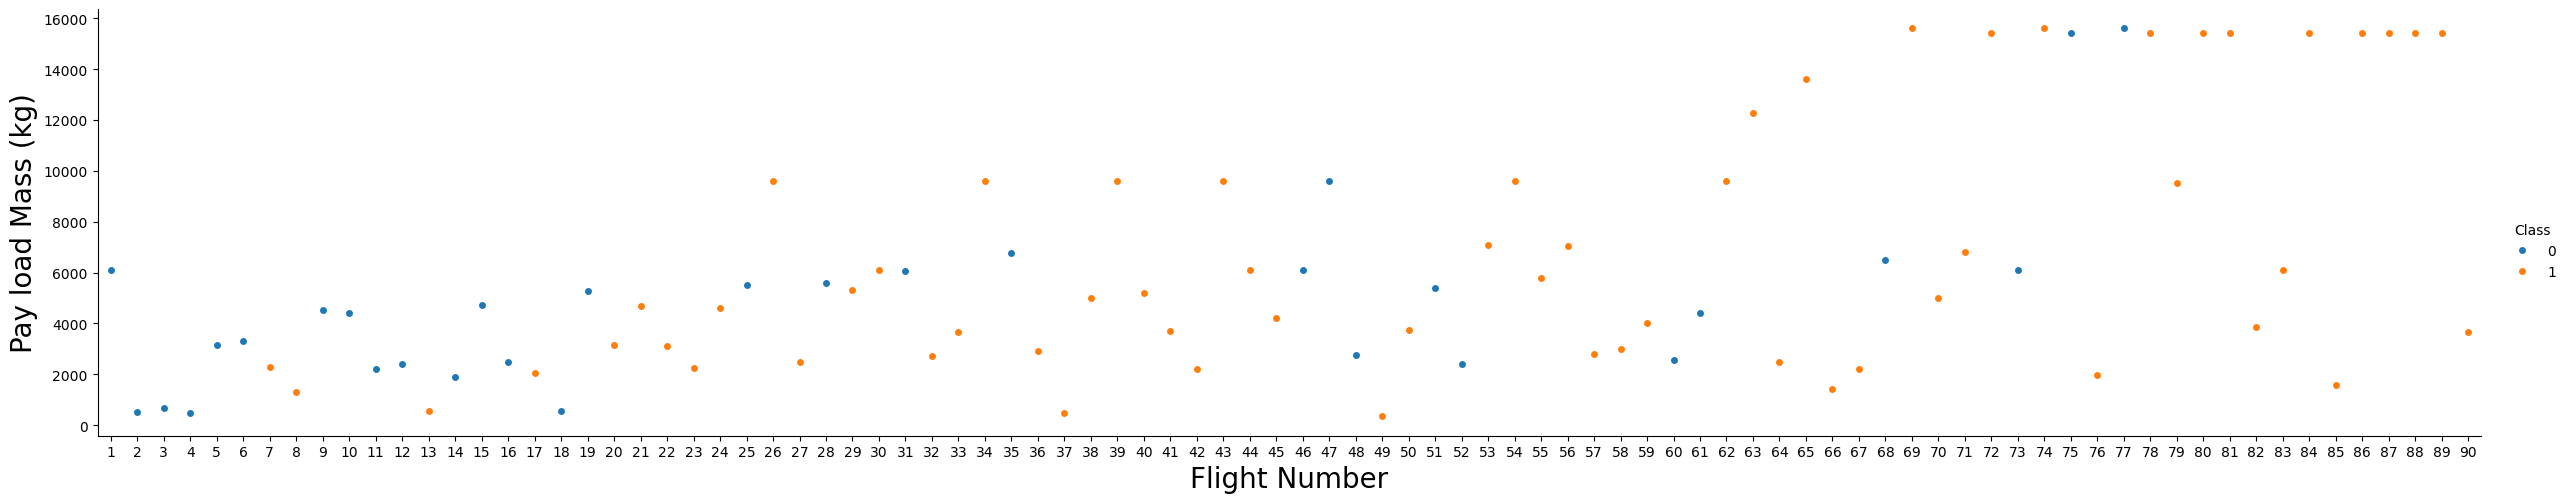

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

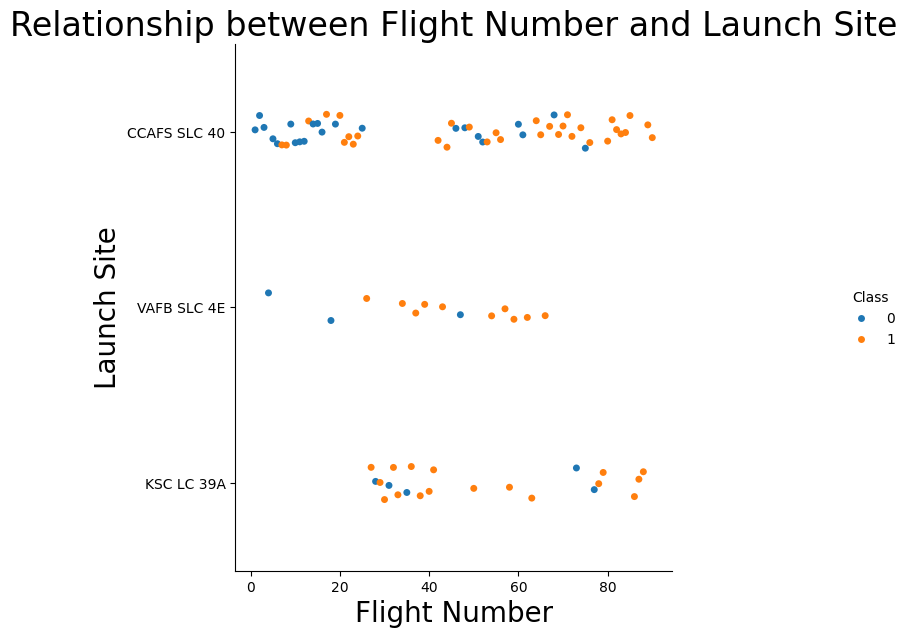

In [22]:
sns.catplot(
    x="FlightNumber", 
    y="LaunchSite", 
    hue="Class", 
    data=df, 
    aspect=1,
    height=6  # Puedes ajustar la altura del gráfico
)

# Etiquetas y título
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Relationship between Flight Number and Launch Site", fontsize=24)

# Mostrar el gráfico
plt.show()

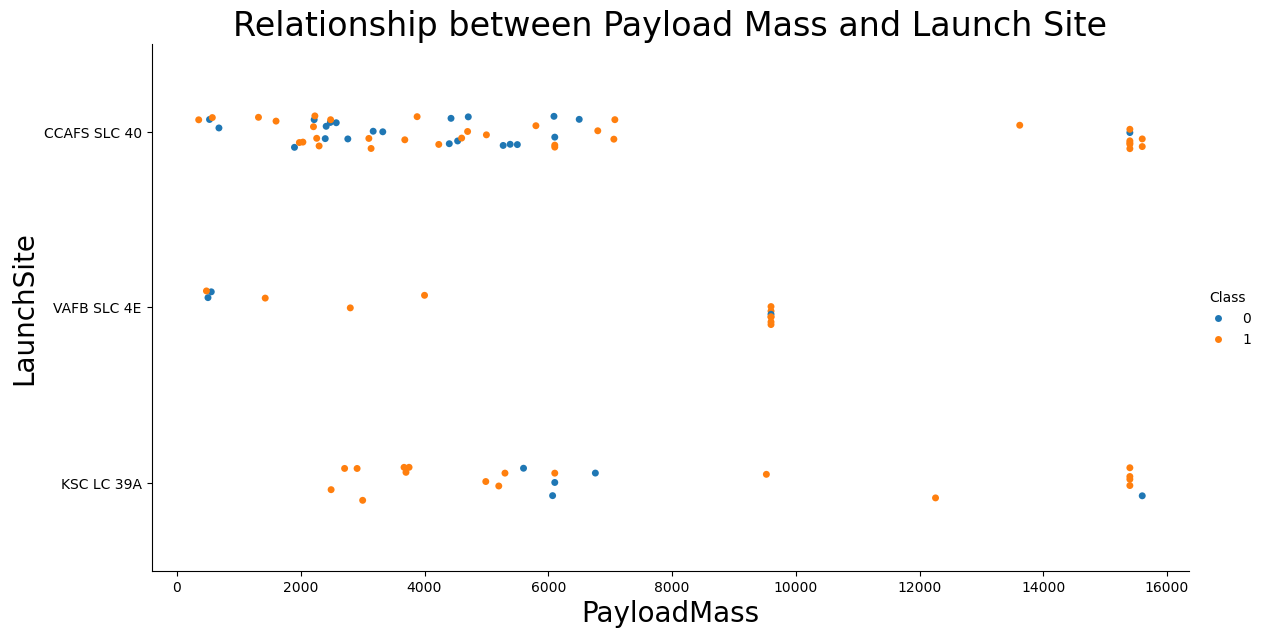

In [9]:
sns.catplot(
    x="PayloadMass", 
    y="LaunchSite", 
    hue="Class", 
    data=df, 
    aspect=2,
    height=6  # Ajusta la altura del gráfico
)

# Etiquetas y título
plt.xlabel("PayloadMass", fontsize=20)
plt.ylabel("LaunchSite", fontsize=20)
plt.title("Relationship between Payload Mass and Launch Site", fontsize=24)

# Mostrar el gráfico
plt.show()

<ipython-input-10-31ff1a07bddf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Orbit", y="SuccessRate", data=success_rate_df, palette="viridis")


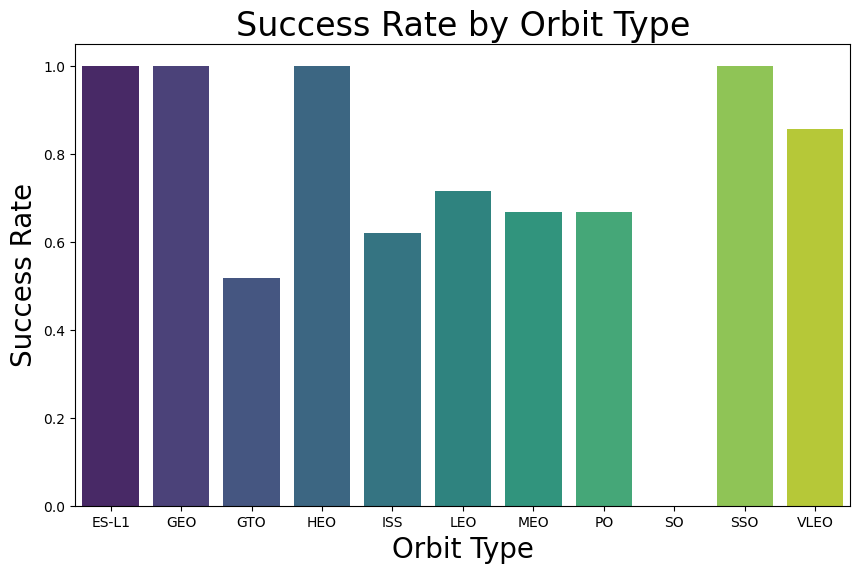

In [10]:
# Calcular la tasa de éxito para cada tipo de órbita
success_rate_df = df.groupby("Orbit")["Class"].mean().reset_index()

# Renombrar las columnas para mayor claridad
success_rate_df.columns = ['Orbit', 'SuccessRate']

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x="Orbit", y="SuccessRate", data=success_rate_df, palette="viridis")

# Etiquetas y título
plt.xlabel("Orbit Type", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.title("Success Rate by Orbit Type", fontsize=24)

# Mostrar el gráfico
plt.show()

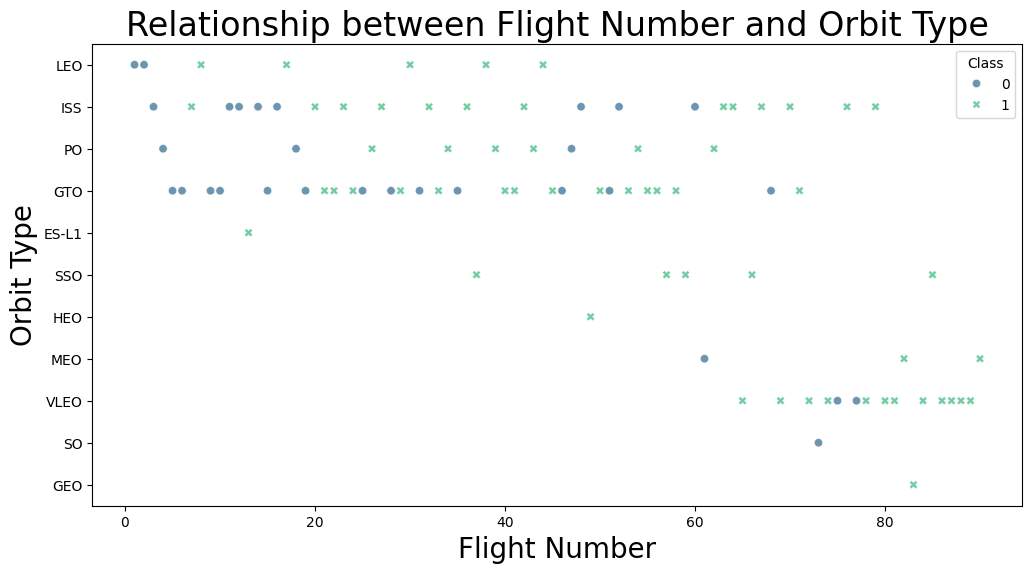

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x="FlightNumber",
    y="Orbit",
    hue="Class",
    data=df,
    palette="viridis",
    alpha=0.7,  # Ajustar la transparencia de los puntos
    style="Class"  # Diferenciar los puntos por forma según la clase
)

# Etiquetas y título
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit Type", fontsize=20)
plt.title("Relationship between Flight Number and Orbit Type", fontsize=24)

# Mostrar el gráfico
plt.legend(title="Class")
plt.show()

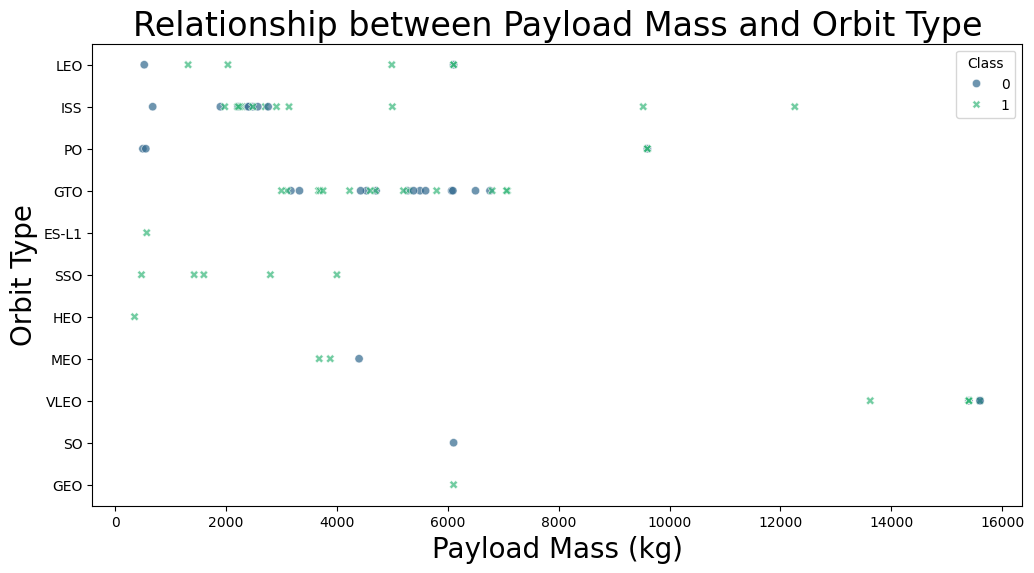

In [12]:
# Crear un gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x="PayloadMass",
    y="Orbit",
    hue="Class",
    data=df,
    palette="viridis",
    alpha=0.7,  # Ajustar la transparencia de los puntos
    style="Class"  # Diferenciar los puntos por forma según la clase
)

# Etiquetas y título
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Orbit Type", fontsize=20)
plt.title("Relationship between Payload Mass and Orbit Type", fontsize=24)

# Mostrar el gráfico
plt.legend(title="Class")
plt.show()

In [13]:
year = []

def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])  # Extrae el año (primer elemento)
    return year

Extract_year()
df['Year'] = year  # Agregar la nueva columna de año al DataFrame
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [14]:
success_rate_by_year = df.groupby("Year")["Class"].mean().reset_index()

# Renombrar la columna para mayor claridad
success_rate_by_year.columns = ['Year', 'AverageSuccessRate']

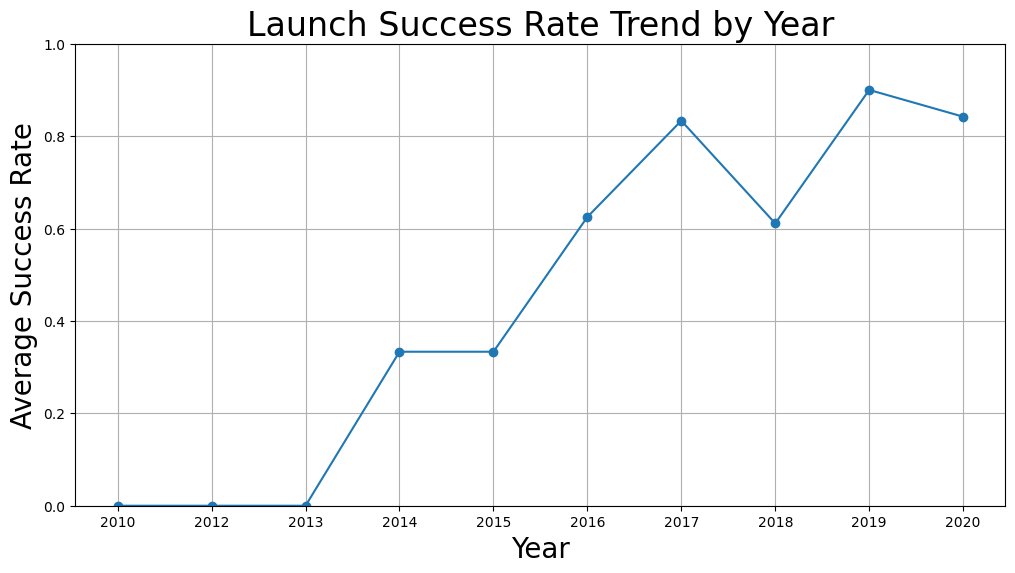

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(success_rate_by_year["Year"], success_rate_by_year["AverageSuccessRate"], marker='o')

# Etiquetas y título
plt.xlabel("Year", fontsize=20)
plt.ylabel("Average Success Rate", fontsize=20)
plt.title("Launch Success Rate Trend by Year", fontsize=24)
plt.ylim(0, 1)  # Configurar el límite del eje y de 0 a 1

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [16]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [21]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], drop_first=True)

# Mostrar las primeras filas del nuevo DataFrame
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,True,...,False,False,False,False,False,False,False,False,False,False


In [18]:
features_one_hot = features_one_hot.astype('float64')

# Mostrar el tipo de datos de cada columna para verificar la conversión
print(features_one_hot.dtypes)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 76, dtype: object


In [19]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [20]:
total_columns = features_one_hot.shape[1]
print(total_columns)

76
